<a href="https://colab.research.google.com/github/Divesh-Kshirsagar/ACME-Annual-Insurance-Premium-Predictor/blob/main/ACME_Annual_Insurance_Premium_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

This notebook aims to estimate annual medical expenditures for new customers using linear regression. It covers data loading, exploration, and pre-processing, including:

*   **Data Retrieval and Initial Inspection:** The notebook starts by retrieving medical charges data from a CSV file and performing initial data inspections using `df.head()`, `df.info()`, and `df.describe()`.
*   **Data Visualization and Distribution Analysis:** It then visualizes the distribution of features like age, BMI, and charges, and explores their relationships with medical charges using scatter plots and histograms.
*   **Categorical Data Analysis:** The notebook further analyzes the impact of categorical features such as 'smoker', 'region', 'sex', and 'children' on medical charges.
*   **Data Pre-processing:** Categorical features like 'smoker' and 'sex' are converted to numerical representations (0s and 1s), and 'region' is one-hot encoded.
*   **Correlation Analysis:** A correlation matrix is generated to identify relationships between numerical features and charges.
*   **Linear Regression Modeling:** Finally, it builds and evaluates simple and multiple linear regression models, separated for smokers and non-smokers, to predict medical charges, analyzing the reduction in loss when more features are added.

In [1]:
# Retrieve dataset
from urllib.request import urlretrieve
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7853c8ef8b90>)

In [58]:
# Read Data
import pandas as pd
df = pd.read_csv("medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# identify Types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Identify certain metrics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

In [5]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = "#000"

In [ ]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [16]:
fig = px.scatter(
    df,
    x="age",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=['sex'],
    title="Age vs Charges"
)

fig.update_traces(marker_size=5)
fig.show()

It appears as if the people who

In [17]:
fig = px.scatter(
    df,
    x="bmi",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=['sex'],
    title="bmi vs Charges"
)

fig.update_traces(marker_size=5)
fig.show()

In [10]:
# identify distribution in non categorical data to figure out any outliers
for i in ["age","bmi", "charges"]:

  fig = px.histogram(
      df,
      x = f"{i}",
      marginal="box",
      nbins=47,
      title=f"Distribution Of {i}"
  )
  fig.update_layout(bargap=0.1)
  fig.show()

- Age Distribution  
The age column looks fine but the age 18 and 19 does seems to have more people there. The quarters are also equally balanced.
It seems like the predictor does not depend on the age.
Whatever you predict you should look at other data to figure out if your assumption is correct or not.
- BMI Distribution   
It appears as if the BMI have guassian distribution.
It appears most people are obese.
So as people are obese so it might be possible that the charges are related to charges as obese are more susceptible to more diseases.
- Charges  
It appears our dataset have higher number of people paying charges between the range of 0 to 14,000.  
We are not sure if the above data is true for national population so further investigation is reuired over them.

In [14]:
#  Now compare categorical data with our target wich is charges
for i in ["smoker", "region", "sex", "children"]:
  fig = px.histogram(
      df,
      x = "charges",
      marginal="box",
      color=f"{i}", # Column to differentiate
      # color_discrete_sequence=["green", "gray"],
      title=f"Annual Medical charges with {i}"
  )
  fig.update_layout(bargap=0.1)
  fig.show()

- Charges with Smoker  
It appears as if non smokers tend to pay less compared to smokers.  
Also there seems to some exceptions might be because of either accidents, or some disease.
- Charges with Region  
It does not seem to have any impact over her.  
When studied further we realised that region does play a role but this dataset does not have enough data or relevant data to validate that claim yet.
- Charges with sex  
Sex does not seem to affect anything.  
Every bar seems to have same distribution.  
- Charges with children  
It looks like there are outliers in this column.  
Cause people with 0 children are paying less but some of them are paying more.  
This is true for everybody else.

In [13]:
px.histogram(df, x='smoker', color='sex', title="Smoker")

It seems that smoking is more common in males.  
20% of the data says that they smoke.  
Our data says 20% but the national average is about 11.8%.

In [15]:
for i in ["age", "bmi"]:
  fig = px.scatter(
      df,
      x=f"{i}",
      y="charges",
      color="smoker",
      opacity=0.8,
      hover_data=['sex'],
      title=f"{i} vs Charges"
  )

  fig.update_traces(marker_size=5)
  fig.show()

- Age  
Age seems to have a upward trend here.  
It seems that this feature is mostly relates to target.  
- BMI  
We know that in fact bmi does contribute in medical charges from total poulation data as health factor decreases with under or overweight.  
But this data doesn't seem to have much relation.  
You can see the data doesn't seem to have any trend and suddenly after bmi approx.30 you will see all the people have paid more.  
Just as the real world where high bmi people does have high medical charges.   

In [21]:
df["smoker"] = (df["smoker"] == "yes").astype(int)
df["sex"] = (df["sex"] == "female").astype(int)

In [64]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [65]:
df[['northeast', 'northwest', 'southeast', 'southwest']] =  enc.transform(df[['region']]).toarray()

In [66]:
df = df.drop("region", axis=1)

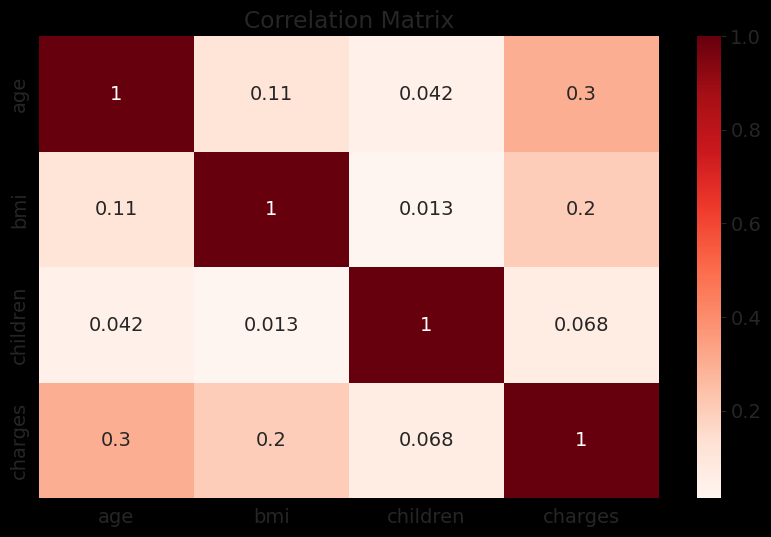

In [67]:
temp = df.drop(["smoker", "sex", "northeast", "northwest", "southeast", "southwest"], axis=1)
sns.heatmap(temp.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

It seems that our prediction was correct this dataset has highest correlation between charges and age.

#Linear Regression For smokers and non smokers

In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [51]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [63]:
for i in ["yes", "no"]:
  temp = df[df.smoker == i]
  inputs = temp[['age']]
  targets = temp.charges
  model.fit(
      inputs,
      targets
  )
  predictions = model.predict(inputs)
  loss = rmse(targets, predictions)
  print(f"""
  For {"" if i == "yes" else "Non"} Smoking Dataset
  -------------------
  1. predictions are {predictions[:5]}
  2. loss is {loss}
  """)



  For  Smoking Dataset
  -------------------
  1. predictions are [26093.642567   39218.85945773 28535.54338388 29451.25619021
 30672.20659865]
  2. loss is 10711.00334810241
  

  For Non Smoking Dataset
  -------------------
  1. predictions are [2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]
  2. loss is 4662.505766636395
  


# Multiple Linear Regression

In [68]:
for i in ["yes", "no"]:
  temp = df[df.smoker == i]
  inputs = temp[['age', 'bmi', 'children']]
  targets = temp.charges
  model.fit(
      inputs,
      targets
  )
  predictions = model.predict(inputs)
  loss = rmse(targets, predictions)
  print(f"""
  For {"" if i == "yes" else "Non"} Smoking Dataset
  -------------------
  1. predictions are {predictions[:5]}
  2. loss is {loss}
  """)



  For  Smoking Dataset
  -------------------
  1. predictions are [22618.1884404  31693.96060294 45210.77119855 36179.04984359
 32574.75789237]
  2. loss is 5718.202480524154
  

  For Non Smoking Dataset
  -------------------
  1. predictions are [2724.94209163 6535.13457204 6065.27173951 5832.57919755 5550.70752502]
  2. loss is 4608.470405038247
  


# Conclusion
We can see that the loss for non smokers have almost reduced by 50% when we used multiple regression.  
This is due to the fact that in the region of smokers there were very few samples for other features such as children and sex leading to this massive drop in non smokers and a little change in smokers.